In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from IPython.display import Image
#Image('HAN2PUCPN3`HYL4B)T$%F3C.png')

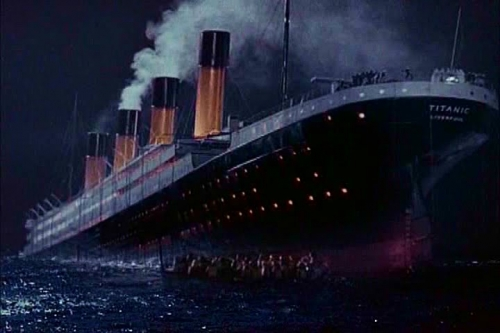

In [3]:
Image('泰坦尼克号.jpg')

In [4]:
df=pd.read_csv(r'train.csv')

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
#df.Embarked.astype(np.object)#更改数据类型，在pd字典识别错误的情况下

In [8]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [9]:
df.shape

(891, 12)

In [10]:
df.describe()#查看数据集的基本情况

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
#总共存货了多少人
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [12]:
df[df.Survived==1].size

4104

In [13]:
#df[df.Survived==1].count()

In [14]:
len(df[df.Survived==1])#求存活率

342

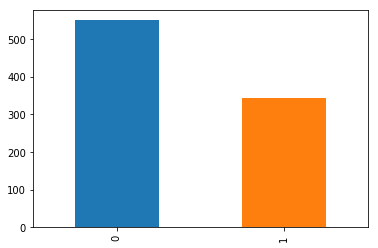

In [15]:
df.Survived.value_counts().plot.bar()#根据存活率画图

In [44]:
df.isnull().sum()#检查数据有多少确实数据

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
df1=df.drop('Cabin',axis=1)#删除数据缺失多的那条数据

In [17]:
df1.size

9801

In [18]:
df1.shape

(891, 11)

In [45]:
df1['Age']=df1.Age.fillna(20)#把空值都补为20

In [20]:
df1.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,20.0,1,2,W./C. 6607,23.45,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,Q


In [54]:
df2=df1[df1['Embarked'].notnull()]

In [22]:
len(df2)

889

In [23]:
df2.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [24]:
df2.pivot_table(values='PassengerId',index='Survived',columns='Sex',aggfunc='count')

Sex,female,male
Survived,,
0,81,468
1,231,109


In [25]:
df3=df[df.Age>60]
len(df3)

22

In [26]:
df4=df[df.Age<17]
len(df4)

100

In [27]:
df2.Age.max()

80.0

In [28]:
df2.Age.min()

0.42

In [29]:
df5=pd.concat([df3,df4])

In [30]:
len(df5)

122

In [31]:
df5.Survived.value_counts()

0    62
1    60
Name: Survived, dtype: int64

In [32]:
df['Survived'].corr(df['Pclass'])

-0.33848103596101475

In [33]:
df5

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.00,0,0,C.A. 24579,10.5000,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.00,0,1,113509,61.9792,B30,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.00,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.50,0,0,370369,7.7500,NaN,Q
170,171,0,1,"Van der hoef, Mr. Wyckoff",male,61.00,0,0,111240,33.5000,B19,S
252,253,0,1,"Stead, Mr. William Thomas",male,62.00,0,0,113514,26.5500,C87,S
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.00,1,0,13502,77.9583,D7,S
280,281,0,3,"Duane, Mr. Frank",male,65.00,0,0,336439,7.7500,NaN,Q
326,327,0,3,"Nysveen, Mr. Johan Hansen",male,61.00,0,0,345364,6.2375,NaN,S
438,439,0,1,"Fortune, Mr. Mark",male,64.00,1,4,19950,263.0000,C23 C25 C27,S


In [34]:
df['Survived'].corr(df['Age'])

-0.07722109457217764

In [35]:
df['Survived'].corr(df['SibSp'])

-0.03532249888573559